<a href="https://colab.research.google.com/github/a2hvin/carti/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install ucimlrepo

In [27]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
solar_flare = fetch_ucirepo(id=89)

# data (as pandas dataframes)
X = solar_flare.data.features
y = solar_flare.data.targets

# metadata
print(solar_flare.metadata)

# variable information
print(solar_flare.variables)


{'uci_id': 89, 'name': 'Solar Flare', 'repository_url': 'https://archive.ics.uci.edu/dataset/89/solar+flare', 'data_url': 'https://archive.ics.uci.edu/static/public/89/data.csv', 'abstract': 'Each class attribute counts the number of solar flares of a certain class that occur in a 24 hour period', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1389, 'num_features': 10, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['common flares', 'moderate flares', 'severe flares'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5530G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Notes:\r\n\r\n   -- The database contains 3 potential classes, one for the number of times a certain type of solar flare occured in a 24 hour period.\r\n   -- Each instance represents captur

In [34]:
import pandas as pd
from ucimlrepo import fetch_ucirepo


solar_flare = fetch_ucirepo(id=89)
X = solar_flare.data.features
y = solar_flare.data.targets

# (lowercase only)
X.columns = [col.lower() for col in X.columns]
y.columns = [col.lower() for col in y.columns]

# Replace missing or invalid values (e.g., '?' strings) with NaN
X = X.replace('?', pd.NA)
y = y.replace('?', pd.NA)

#  Remove any rows with missing values
df = pd.concat([X, y], axis=1)
df = df.dropna()

# cleaned: lowercase columns, no missing values
print(df.head())


  modified zurich class largest spot size spot distribution  activity  \
0                     C                 S                 O         1   
1                     D                 S                 O         1   
2                     C                 S                 O         1   
3                     D                 S                 O         1   
4                     D                 A                 O         1   

   evolution  previous 24 hour flare activity  historically-complex  \
0          2                                1                     1   
1          3                                1                     1   
2          3                                1                     1   
3          3                                1                     1   
4          3                                1                     1   

   became complex on this pass  area  area of largest spot  common flares  \
0                            2     1                     

/tmp/ipython-input-38-3539729547.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='evolution', palette='pastel')


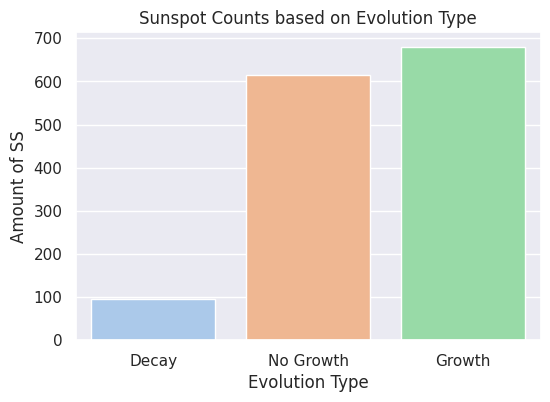

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()#seaborn theme

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='evolution', palette='pastel')
plt.title('Sunspot Counts based on Evolution Type')
plt.xlabel('Evolution Type')
plt.ylabel('Amount of SS')
plt.xticks(ticks=[0,1,2], labels=['Decay', 'No Growth', 'Growth'])
plt.show()

#shows how many sunspot groups there are of each evolution type in your dataset.
#The x-axis lists the different evolution types (like 1 = decay, 2 = no growth, 3 = growth).
#The y-axis shows how many sunspot groups fall into each type.

/tmp/ipython-input-50-2305802810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='evolution', y='severe flares', palette='muted')


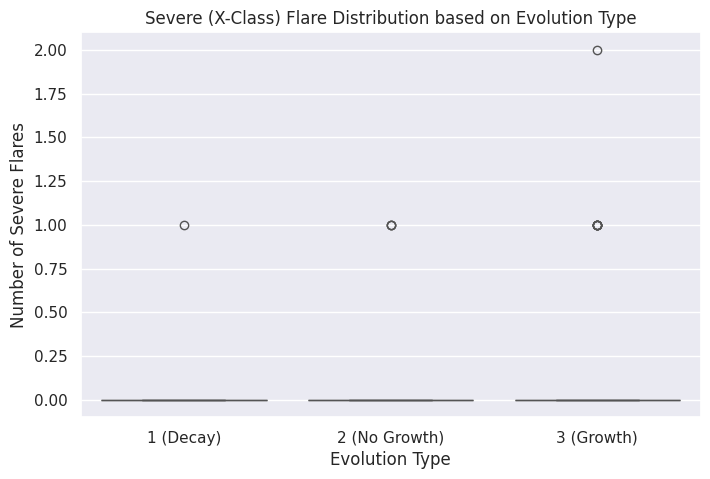

In [50]:

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='evolution', y='severe flares', palette='muted')

plt.title('Severe (X-Class) Flare Distribution based on Evolution Type')
plt.xlabel('Evolution Type')
plt.ylabel('Number of Severe Flares')

plt.xticks(ticks=[0,1,2], labels=['1 (Decay)', '2 (No Growth)', '3 (Growth)'])

plt.show()
#see how the number of severe (X-class) solar flares varies across different sunspot evolution types (Decay, No Growth, Growth).
#The median flare count for each evolution type (the line inside each box).
#The spread of flare counts (how much variation there is).
#Any outliers (unusually high flare counts).
#If one evolution type tends to have higher median or more frequent high flare counts, that suggests it’s linked to higher flare risk.



In [62]:
print("Null Hypothesis:")
print("The mean total flare activity is the same across all sunspot evolution types.")

print("Alternative Hypothesis:")
print("At least one sunspot evolution type has a different mean total flare activity.")




Null Hypothesis:
The mean total flare activity is the same across all sunspot evolution types.
Alternative Hypothesis:
At least one sunspot evolution type has a different mean total flare activity.


In [64]:
import scipy.stats as stats

# Null hypothesis: Mean total flare activity is the same for all evolution types.
# Alternative hypothesis: At least one evolution type has a different mean total flare activity.

groups = [df[df['evolution'] == i]['total_flares'] for i in sorted(df['evolution'].unique())]

f_stat, p_val = stats.f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}")

if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in total flare activity between evolution types.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between evolution types.")


ANOVA F-statistic: 3.694
p-value: 0.025
Reject the null hypothesis: There is a significant difference in total flare activity between evolution types.
